## The SVD and Image Compression

By : Dylan Wattles

This presentation outlines several useful features of the SVD for real matricies, and then demonstrates how one can use the SVD for image compression.

## What is the SVD?

The SVD, or _[singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)_, generalizes eigendecomposition to matrices that are not diagonalizable. The SVD decomposition when applied to a real matrix, $ \mathbf{A} $ is traditionally denoted by $ \mathbf{U} \mathbf{\Sigma} \mathbf{V}^\top $. $ \mathbf{U}, \mathbf{V} $ are orthogonal matrices and $ \mathbf{\Sigma} $ is a matrix that has same dimensions as $ \mathbf{A} $. Additionally $ \mathbf{\Sigma} $ has all zeros except for possible nozero values on the main diagonal called singular values, usually denoted by $\sigma_i$, which are arranged in decreasing order starting from the left corner. Although it is not very hard to also decompose complex matrices in a similar manner, the demonstration here does not require the use of complex matrices, so for simplicity the SVD here will be exclusively used to decompose real matricies.

The SVD has some important features listed below:

Each $ \sigma_i $ where $ 1 \leq i \leq rank(\mathbf{A}) $ , and m and n are the number of rows and columns respectively, is an eigenvalue of $ \mathbf{A}^\top \mathbf{A} $ or $ \mathbf{AA^\top} $. $\newline$
The singular values are unique, but the matrices $ \mathbf{U} $ and $ \mathbf{V} $ are not unique.
$ \mathbf{V} $ diagonalizes $ \mathbf{A}^\top \mathbf{A} $ and similiarly $ \mathbf{U} $ diagonalizes $ \mathbf{AA^\top} $. $\newline$
The rank of a matrix is equal to the number of nozero singular values it has. $\newline$
If $ \mathbf{A}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top $ and $ \mathbf{A'}=\mathbf{U}\mathbf{\Sigma'}\mathbf{V}^\top $ where $ \mathbf{\Sigma'} $ has the k largest singular values of $ \mathbf{A} $, then $\mathbf{A'}$ is the closest rank k approximation to $\mathbf{A}$ with respect to the Frobenius norm, which is defined as the square root of the sum of the squares of all entries in the matrix. $\newline$
If $ \mathbf{A}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top $, then $ \mathbf{A}=\sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top + \sigma_2 \mathbf{u}_2 \mathbf{v}_2^\top + \ldots + \sigma_{r} \mathbf{u}_{r} \mathbf{v}_{r}^\top $, where $ \mathbf{u}_i $ and $\mathbf{v}_i $ represent column vectors of $\mathbf{U}$ and $\mathbf{V} $ respectively, r is the rank of $\mathbf{A}$ and $ \sigma_1 \geq \sigma_2 \geq \ldots \geq \sigma_{r} \geq 0 $. This is also called the outer product expansion or rank 1 tensor decomposition.

In [2]:
import numpy as np
import scipy
import scipy.linalg

SVD is [implemented in `scipy.linalg.svd`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html).

In [2]:
A = np.array([[-2,8,20],[14,19,10],[2,-2,1]])
U, s, V = scipy.linalg.svd(A)

Compare V and the corresponding singular values to the to the eiegnvectors and their corresponding eigenvalues of $ \mathbf{A}^\top\mathbf{A} $.

In [3]:
print(V)
print(s)  # Note that only the singular values are given, not the entire matrix Sigma
np.linalg.eig(A.T@A)

[[ 0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]
 [ 0.66666667 -0.66666667  0.33333333]]
[30. 15.  3.]


(array([900.,   9., 225.]),
 array([[-0.33333333, -0.66666667, -0.66666667],
        [-0.66666667,  0.66666667, -0.33333333],
        [-0.66666667, -0.33333333,  0.66666667]]))

In [4]:
# Check orthogonality
print(U@U.T)
print(V@V.T)

[[ 1.00000000e+00 -7.10542736e-17  1.10328413e-16]
 [-7.10542736e-17  1.00000000e+00 -5.55111512e-18]
 [ 1.10328413e-16 -5.55111512e-18  1.00000000e+00]]
[[ 1.00000000e+00 -6.78469626e-17  3.39234813e-17]
 [-6.78469626e-17  1.00000000e+00  1.23358114e-17]
 [ 3.39234813e-17  1.23358114e-17  1.00000000e+00]]


In [5]:
# Reconstruct full matrix Sigma with singular values
S = scipy.linalg.diagsvd(s, A.shape[0], A.shape[1])
print(S)

[[30.  0.  0.]
 [ 0. 15.  0.]
 [ 0.  0.  3.]]


In [6]:
# should be the original matrix
print(U@S@V)

[[-2.  8. 20.]
 [14. 19. 10.]
 [ 2. -2.  1.]]


In [10]:
# outer product expansion
print(s[0]*np.outer(U[:,:1],V[:1,:])+s[1]*np.outer(U[:,1:2],V[1:2,:])+s[2]*np.outer(U[:,2:3],V[2:3,:]))

[[-2.  8. 20.]
 [14. 19. 10.]
 [ 2. -2.  1.]]


In [11]:
# different way to index for the outer product expansion
print(s[0]*np.outer(U.T[0],V[0])+s[1]*np.outer(U.T[1],V[1])+s[2]*np.outer(U.T[2],V[2]))

[[-2.  8. 20.]
 [14. 19. 10.]
 [ 2. -2.  1.]]


## Image Compression

Grey scale images can be represented as matrices where the entries indicate the intensity of a single pixel. We can use the SVD to compress the total amount of data we need to represent the image by taking the best $ k $ rank approximation to an image(with respect to the Frobenius norm). Put simply, we can just truncate the outer product expansion in the following way $ \mathbf{A}=\sigma_1 \mathbf{u}_1 \mathbf{v}_1^\top + \sigma_2 \mathbf{u}_2 \mathbf{v}_2^\top + \ldots + \sigma_{k} \mathbf{u}_{k} \mathbf{v}_{k}^\top $ where $ k $ is smaller than the rank of $\mathbf{A}$.

In [2]:
# Image will allow us to convert a colored picture into a grey scaled one

import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

https://windows10spotlight.com/images/3dc08f1e19cb43b007a0466c7f0f54b1

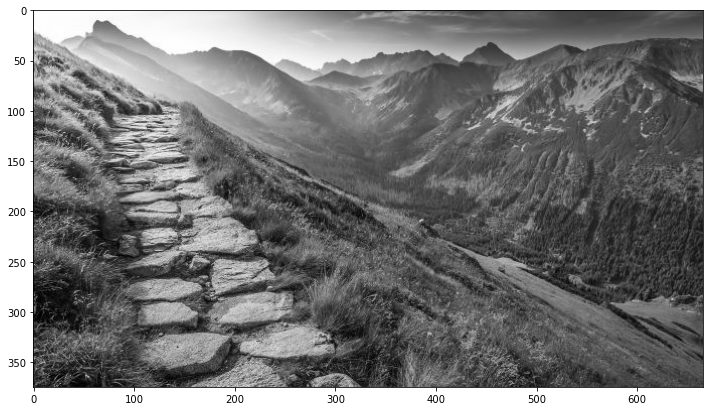

In [3]:
# one way to convert a color jpg image into a grey scaled image
im = Image.open('Tatra National Park small.jpg')
imgray = im.convert('LA')
plt.figure(figsize = (12, 8))
plt.imshow(imgray)

matrix([[169., 250., 252., ...,  84.,  82.,  82.],
        [169., 250., 252., ...,  82.,  80.,  80.],
        [169., 250., 252., ...,  81.,  75.,  75.],
        ...,
        [ 21.,  37., 109., ...,  67.,  62.,  61.],
        [ 82.,  71.,  61., ...,  89.,  72.,  71.],
        [ 82.,  64.,  46., ...,  71.,  77.,  77.]])

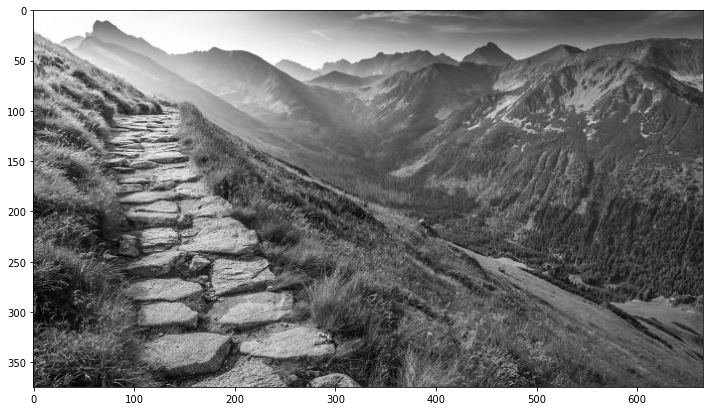

In [4]:
# we can represent the grey scaled image as a matrix
A = np.array(list(imgray.getdata(band = 0)), float)
A.shape = (imgray.size[1], imgray.size[0])
A = np.matrix(A)

# just to show that the matrix is indeed the picture from before
plt.figure(figsize = (12,8))
plt.imshow(A, cmap='gray')
A

In [5]:
# function to truncate the outer product expansion of a matrix
def rankapprox(A,k):
    U, s, V = scipy.linalg.svd(A)
    Ak=np.zeros((A.shape[0],A.shape[1]))
    for i in range(k):
        Ak=Ak+s[i]*np.outer(U.T[i],V[i])
    return(Ak)

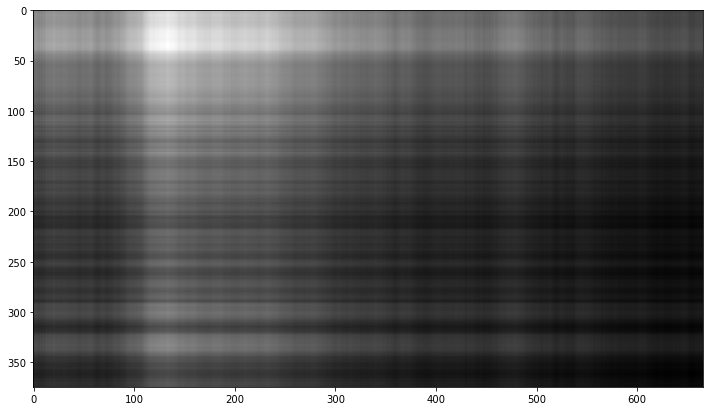

In [6]:
# rank 1 approximation
plt.figure(figsize = (12,8))
plt.imshow(rankapprox(A,1), cmap = 'gray')

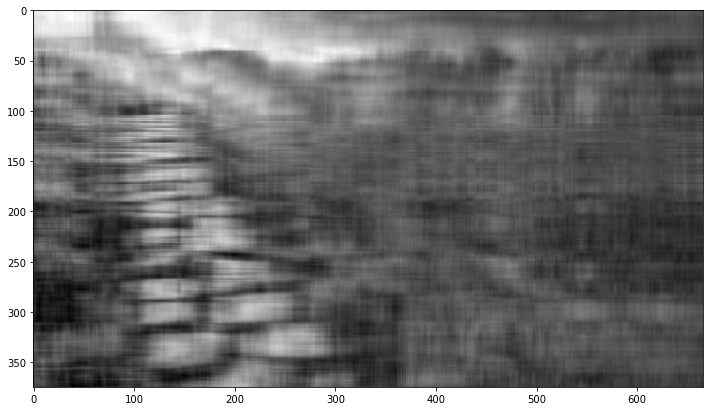

In [7]:
# rank 10 approximation
plt.figure(figsize = (12,8))
plt.imshow(rankapprox(A,10), cmap = 'gray')

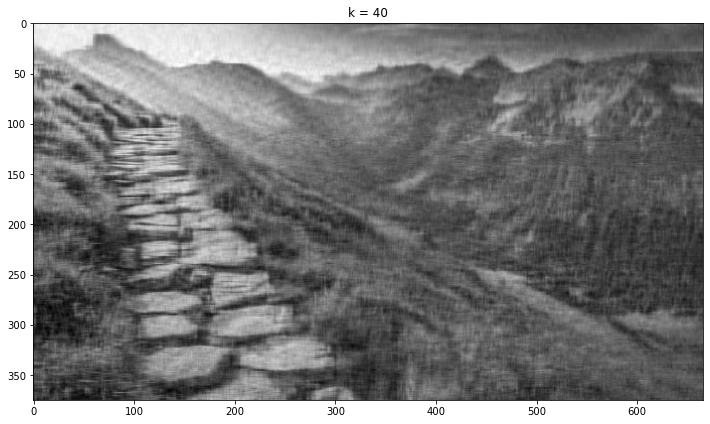

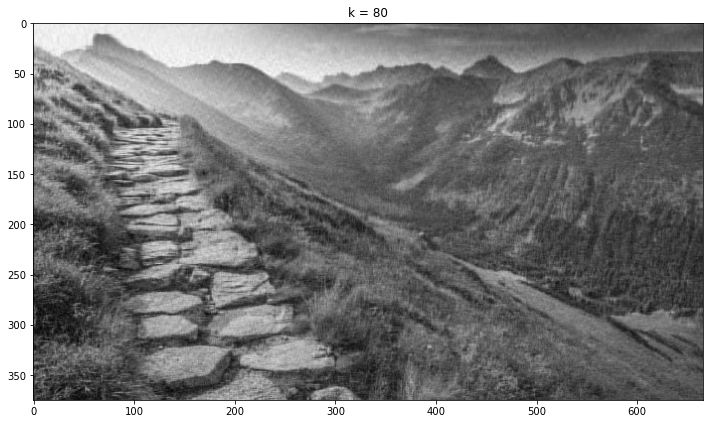

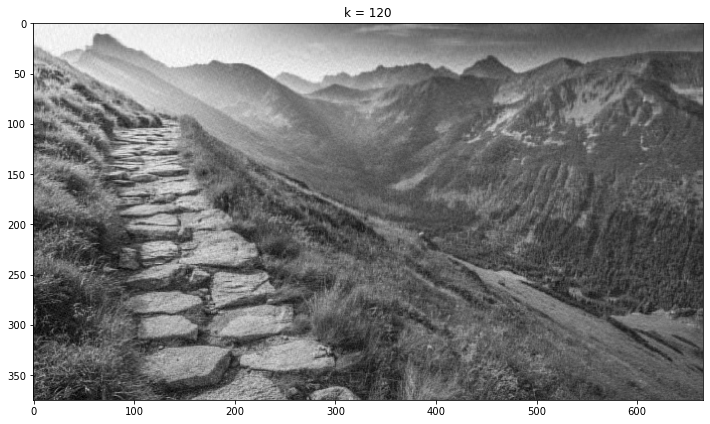

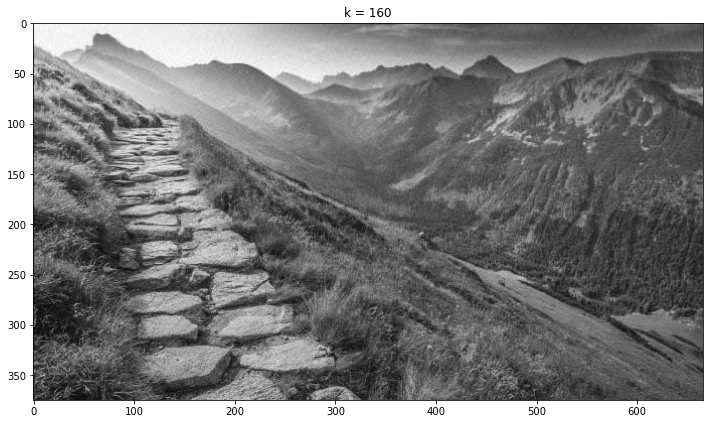

In [8]:
# different rank k approximations of the image
for i in range(40,161,40):
    plt.figure(figsize = (12,8))
    plt.imshow(rankapprox(A,i), cmap='gray')
    title = "k = %s" % i
    plt.title(title)

In [25]:
# percentage of the data that is used for the rank 80 and 160 approximations
print((80*A.shape[0]+80+80*A.shape[1])/(A.shape[0]*A.shape[1]))
print((160*A.shape[0]+160+160*A.shape[1])/(A.shape[0]*A.shape[1]))

0.33377377377377376
0.6675475475475475
